<a href="https://colab.research.google.com/github/AnushkaDwivedi17/datathon/blob/master/datasprint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np


In [2]:
#reading dataset from github and converting into pandas's dataframe
abalone_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv" )

In [3]:
#viewing the dataset
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.2080,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.1400,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.7800,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.6000,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.3450,12
...,...,...,...,...,...,...,...,...,...
3127,M,0.415,0.315,0.120,0.4015,0.1990,0.0870,0.0970,8
3128,I,0.325,0.240,0.070,0.1520,0.0565,0.0305,0.0540,8
3129,M,0.565,0.455,0.155,0.9355,0.4210,0.1830,0.2600,11
3130,M,0.610,0.485,0.145,1.3305,0.7830,0.2255,0.2865,9


In [4]:
len(abalone_data)

3132

In [5]:
abalone_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


In [8]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sea

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
abalone_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

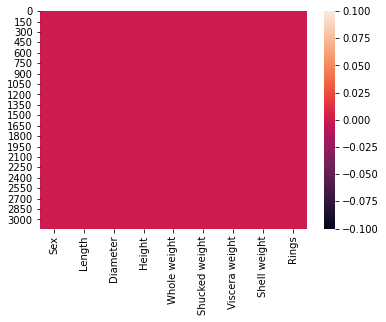

In [10]:
sea.heatmap(abalone_data.isna())

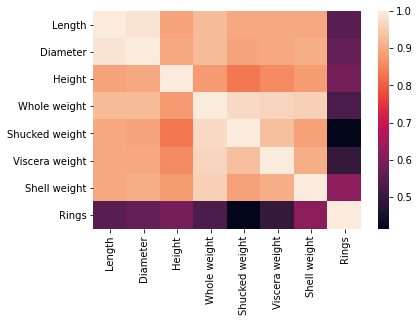

In [13]:
sea.heatmap(abalone_data.corr())

In [15]:
abalone_data.Sex.unique()

array(['F', 'M', 'I'], dtype=object)

In [24]:
abalone_data=pd.get_dummies(abalone_data)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [25]:
scaler.fit(abalone_data) 

StandardScaler(copy=True, with_mean=True, with_std=True)

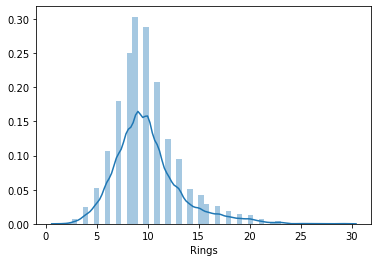

In [28]:
sea.distplot(abalone_data['Rings'])

In [29]:
x=abalone_data.drop('Rings', axis = 1)
y=abalone_data.Rings

In [30]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.3, random_state = 42)

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
LR = LinearRegression(normalize=True)
LR.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
LR.score(x_tr,y_tr)

0.553739093189545

In [36]:
predictions = LR.predict(x_ts)

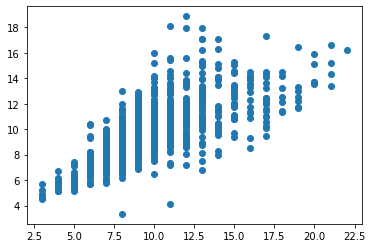

In [37]:
plt.scatter(y_ts,predictions)

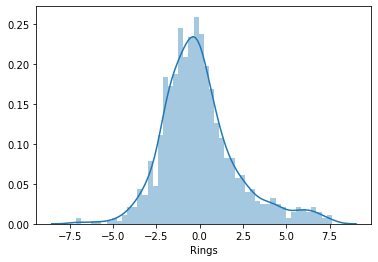

In [39]:
sea.distplot((y_ts-predictions),bins=50);

In [40]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_ts, predictions))) 

Root Mean Squared Error is:  2.193277654357593


In [41]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')

In [42]:
test_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490
...,...,...,...,...,...,...,...,...
1039,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300
1040,I,0.520,0.395,0.115,0.6445,0.3155,0.1245,0.1860
1041,I,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.1400
1042,M,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.3950


In [43]:
test_data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [44]:
test_data=pd.get_dummies(test_data)

In [45]:
scalert = StandardScaler()
scalert.fit(test_data) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv')         
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 20)
rf.fit(x_tr, y_tr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [50]:
rf.score(x_tr,y_tr)

0.9373586433817456

In [51]:
pred = LR.predict(x_ts)

In [52]:
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_ts, pred))) 

Root Mean Squared Error is:  2.193277654357593


In [53]:
tar=rf.predict(test_data)

In [54]:
for i in tar:
  print(i,end=",")

10.089,6.405,7.195,12.054,9.084,14.25,9.976,11.205,10.535,9.139,10.834,10.684,8.937,11.382,11.946,10.314,9.433,8.009,5.725,12.436,9.253,10.893,10.565,10.235,11.75,13.613,12.06,7.965,12.446,9.201,10.111,10.939,11.029,10.673,8.23,6.446,12.494,11.264,8.294,9.843,7.862,8.833,5.825,10.67,10.299,7.543,9.874,9.785,9.281,5.512,8.519,10.162,11.601,9.185,12.356,13.66,10.392,6.279,7.19,9.232,7.895,10.345,3.641,9.689,9.172,10.11,11.891,12.728,9.132,9.874,10.267,8.067,14.597,8.977,10.205,8.893,7.341,7.464,10.069,10.82,9.453,6.229,10.827,10.794,7.233,7.384,10.505,10.77,7.133,14.407,9.782,12.789,15.919,8.479,10.392,10.437,8.778,13.023,9.308,7.087,4.645,10.641,11.804,12.683,8.12,9.657,9.567,11.341,10.593,7.748,4.048,7.059,6.54,8.103,7.57,8.677,12.758,10.127,8.124,7.71,7.502,7.049,6.739,7.124,15.585,6.652,10.566,7.072,15.082,14.577,4.081,9.033,9.991,11.774,5.749,9.097,8.604,8.861,14.54,8.022,10.9,10.491,12.6,9.043,9.374,11.644,8.209,10.331,5.97,10.679,14.381,13.793,7.877,4.68,12.482,11.636,9.038,11.139

In [61]:
scaler.transform(abalone_data)

array([[ 0.01078734, -0.08006193, -0.10970449, ...,  1.4807635 ,
        -0.69141571, -0.75545492],
       [-0.65658952, -0.83519331, -0.36621398, ...,  1.4807635 ,
        -0.69141571, -0.75545492],
       [ 1.55409632,  1.32951665,  0.65982397, ..., -0.67532729,
        -0.69141571,  1.32370572],
       ...,
       [ 0.34447577,  0.47370108,  0.40331449, ..., -0.67532729,
        -0.69141571,  1.32370572],
       [ 0.71987525,  0.77575364,  0.146805  , ..., -0.67532729,
        -0.69141571,  1.32370572],
       [ 1.09527473,  0.977122  ,  1.30109769, ...,  1.4807635 ,
        -0.69141571, -0.75545492]])

In [67]:
scaler.transform(test_data)

ValueError: ignored

In [62]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_tr, y_tr)
regr_2.fit(x_tr, y_tr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

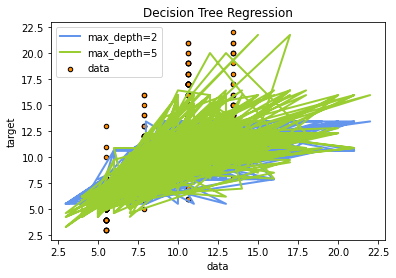

In [66]:
y_1 = regr_1.predict(x_ts)
y_2 = regr_2.predict(x_ts)

# Plot the results
plt.figure()
plt.scatter(y_1, y_ts, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(y_ts, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(y_ts, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [68]:
tardt=regr_2.predict(test_data)
for i in tardt:
  print(i,end=",")

9.496124031007753,6.966019417475728,6.966019417475728,12.301369863013699,8.86259541984733,15.959183673469388,10.874035989717223,10.874035989717223,10.352459016393443,8.86259541984733,13.774193548387096,10.874035989717223,10.352459016393443,12.301369863013699,12.301369863013699,10.874035989717223,9.724806201550388,7.933333333333334,5.0,13.774193548387096,9.496124031007753,10.930232558139535,10.874035989717223,10.874035989717223,10.930232558139535,12.301369863013699,10.874035989717223,8.8,12.301369863013699,8.86259541984733,9.724806201550388,10.874035989717223,10.874035989717223,10.874035989717223,8.5,6.197183098591549,10.874035989717223,12.301369863013699,8.86259541984733,8.86259541984733,9.724806201550388,9.724806201550388,6.197183098591549,10.874035989717223,10.874035989717223,7.0,12.301369863013699,9.496124031007753,8.86259541984733,5.875,9.724806201550388,12.301369863013699,12.245098039215685,8.5,10.874035989717223,15.959183673469388,9.724806201550388,6.197183098591549,6.96601941747